In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from model.vae import VAE, train_autoencoder, test_autoencoder, show_decoder_quality
from dataloader.builder import build_dataset

In [3]:
batch_size = 128
log_interval = 100
epochs = 50


dataset = build_dataset('mnist', val_size=10_000)
x_train, y_train = dataset.dataset('train') 
x_val, y_val = dataset.dataset('val')
train_ds = TensorDataset(torch.FloatTensor(x_train), torch.LongTensor(y_train))
val_ds = TensorDataset(torch.FloatTensor(x_val), torch.LongTensor(y_val))

train_dl = DataLoader(train_ds, batch_size=batch_size)
val_dl = DataLoader(val_ds, batch_size=batch_size)

In [4]:

model = VAE()
model.cuda()
optimizer = torch.optim.Adam(model.parameters())


In [5]:
# model.load_state_dict(torch.load('data/models/vae.torch'))

for epoch in range(1, epochs + 1):
    train_autoencoder(epoch, train_dl, log_interval, model, optimizer)
    test_autoencoder(val_dl, model)
    
torch.save(model.state_dict(), 'data/models/vae.torch')


/home/mephody_bro/anaconda3/envs/uq/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train Epoch: 1 [0/60000 (0%)]	Loss: 20403474.000000
Train Epoch: 1 [12800/60000 (21%)]	Loss: -753728.687500
Train Epoch: 1 [25600/60000 (43%)]	Loss: -725303.187500
Train Epoch: 1 [38400/60000 (64%)]	Loss: -684366.562500
Train Epoch: 1 [51200/60000 (85%)]	Loss: -683860.812500
====> Epoch: 1 Average loss: -655415.3598
====> Test set loss: -709565.6367
Train Epoch: 2 [0/60000 (0%)]	Loss: -684766.062500
Train Epoch: 2 [12800/60000 (21%)]	Loss: -755730.687500
Train Epoch: 2 [25600/60000 (43%)]	Loss: -726856.812500
Train Epoch: 2 [38400/60000 (64%)]	Loss: -684692.937500
Train Epoch: 2 [51200/60000 (85%)]	Loss: -684278.125000
====> Epoch: 2 Average loss: -709187.2799
====> Test set loss: -709831.4407
Train Epoch: 3 [0/60000 (0%)]	Loss: -685017.437500
Train Epoch: 3 [12800/60000 (21%)]	Loss: -755855.937500
Train Epoch: 3 [25600/60000 (43%)]	Loss: -722514.062500
Train Epoch: 3 [38400/60000 (64%)]	Loss: -683962.375000
Train Epoch: 3 [51200/60000 (85%)]	Loss: -684433.375000
====> Epoch: 3 Average

# Check examples

### This visualization will show that the autoencoder works, and the decoded images resemble the original

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
torch.Size([25, 784])


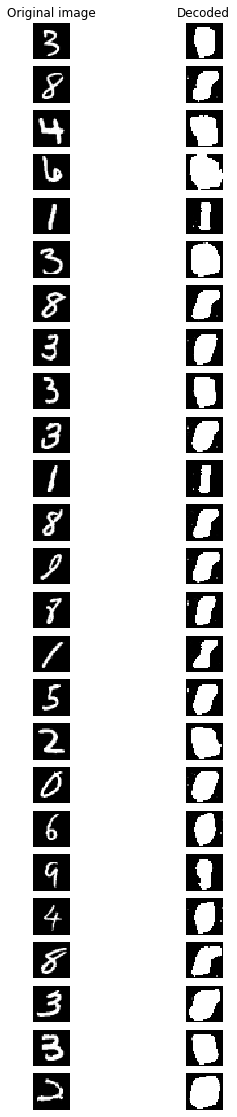

In [6]:
_, (exs, _) = next(enumerate(val_dl))
mini_batch = exs[:25,:]

show_decoder_quality(mini_batch, model)